US Video Game Sales in Relation to ESRB Rating and Genre<br>

By Riley Stange
<br>For Thinkful Capstone 1: Business Research
<br>Dataset Sourced from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
<br>Cleaning: Changed anything with the now obsolete rating of 'K-A' to 'E', since they are considered equivalent.

In [139]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
sns.set(style="darkgrid")

In [108]:
sales = pd.read_csv(
    "~/projects/video-game-sales-by-maturity-rating/Video_Games_Sales_as_at_22_Dec_2016.csv"
)

In [124]:
# Only pull from entries where there are US sales
# and where there is a rating
na_sales = sales[
    (sales["NA_Sales"] > 0) & sales.Rating.notnull()
]

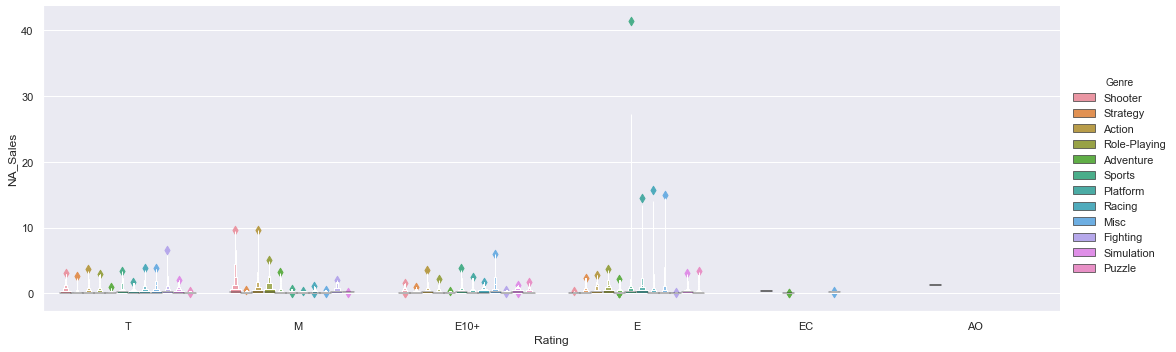

In [100]:
sns.catplot(
    x="Rating",
    y="NA_Sales",
    kind="boxen",
    hue="Genre",
    aspect=3,
    data=na_sales.sort_values("NA_Sales")
)
plt.show()

It appears that there are a few outliers:
<br>One occuring above 41 million in the Sports category on the Rating = E chart
<br>Another occuring around 1 million in the Action category on the Rating = AO chart
<br>And a few in only the perhaps 10s of thousands across Simulation, Fighting, and Racing categories in the EC chart.
<br>These are infrequent occurences and should be excluded to get a better picture of the other charts.
<br>It is also important to note that the EC rating was retired in 2018, further confirming it's present-day irrelevance.

In [177]:
# Eliminating extreme outliers of sales more than 30 million,
# and Adult Only/Early Childhood rated entries.
colors = sns.color_palette(
    ["#37f400", "#d6f400", "#f40000", "#f3b701"]
)

na_sales_e_to_m = sales[
    (sales["NA_Sales"] > 0)
    & (sales["NA_Sales"] < 30)
    & sales.Rating.notnull()
    & (sales["Rating"] != "AO")
    & (sales["Rating"] != "EC")
]

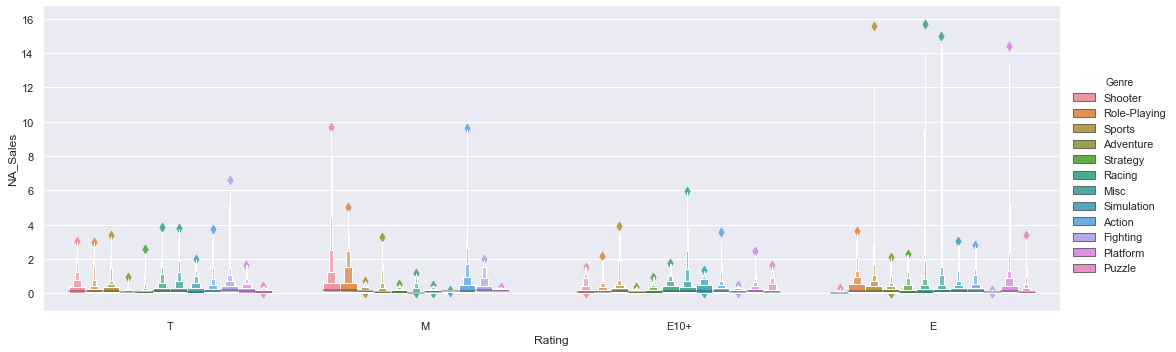

In [115]:
sns.catplot(
    x="Rating",
    y="NA_Sales",
    kind="boxen",
    hue="Genre",
    aspect=3,
    data=na_sales_e_to_m.sort_values("NA_Sales")
)
plt.show()

That's better! Though this could still be a clearer picture:<br>
By making each Genre it's own plot, with Rating as a color-coded category to show clear trends and differences among all the genres.

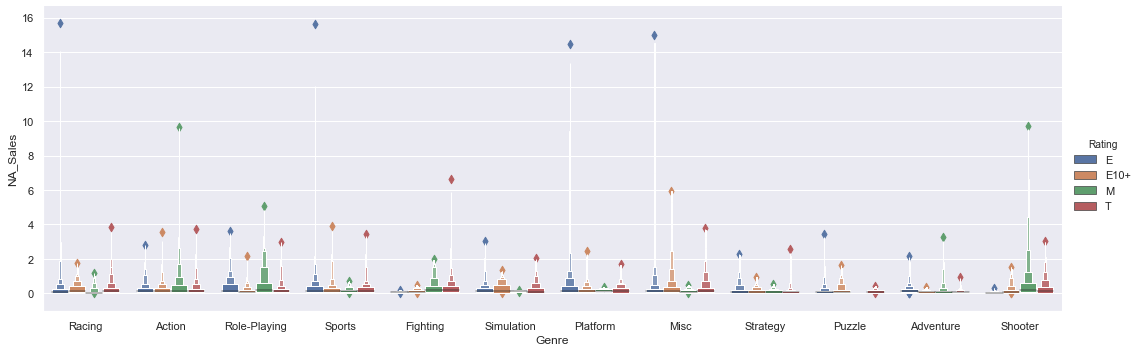

In [123]:
sns.catplot(
    x="Genre",
    y="NA_Sales",
    kind="boxen",
    hue="Rating",
    aspect=3,
    data=na_sales_e_to_m.sort_values("Rating")
)
plt.show()

Starting from the top of the chart: we have four titles that sold between 14-16 million USD, one from Sports, one from Racing, one from Misc, and one from Platform. All of which are rated E.<br>
This aligns with intuition, to see that the best sellers (including the one outlier that sold for 41 million USD) are all rated E, where their content is not offensive to anyone in particular, allowing for the largest potential audience.<br>
This however, does not mean that games of other ratings do not have a valid audience, and as we see, there are only four (5 if you include the outlier) of games that sold for more than 14 million USD, but if you look at where the bulk of the action is happening, below the 4 million, and mostly below the 3 million mark, it seems that there is a potentially much larger market for M rated games, especially within the Shooter and Role-Playing genres.<br>
A next step is to take a closer look at each genre and compare the sales statistics based on genre.

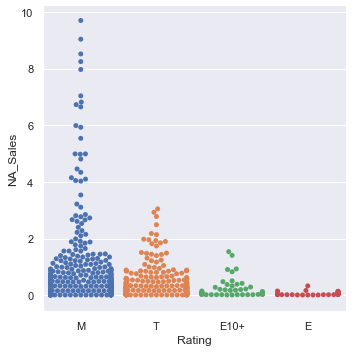

In [137]:
sns.catplot(
    x="Rating",
    y="NA_Sales",
    kind="swarm",
    data=na_sales_e_to_m[
        na_sales_e_to_m["Genre"] == "Shooter"
    ],
)
plt.show()

Since we are working with a smaller set of data, we can utilize a swarm plot to see each individual data point, which makes it clearer where the density lies in this genre. 

In [140]:
tukey = pairwise_tukeyhsd(
    endog=na_sales_e_to_m["NA_Sales"],  # Data
    groups=na_sales_e_to_m["Rating"],  # Groups
    alpha=0.05, # Significance level
)  

In [141]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
E,E10+,-0.0673,0.02,-0.1271,-0.0075,True
E,M,0.1926,0.001,0.1343,0.2509,True
E,T,-0.0467,0.0564,-0.0942,0.0008,False
E10+,M,0.2599,0.001,0.1884,0.3314,True
E10+,T,0.0206,0.8125,-0.0423,0.0836,False
M,T,-0.2393,0.001,-0.3009,-0.1777,True
